In [329]:
import torch

In [330]:
torch.zeros([7,3])

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [331]:
torch.ones([7,3])

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [332]:
tmp=torch.Tensor([1,2,3])
tmp.unsqueeze(1)

tensor([[1.],
        [2.],
        [3.]])

In [333]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize']=(25.0,7.0)

In [334]:
x_train=torch.rand(1000)
x_train=x_train*10.0-5.0
x_train

tensor([ 3.6320, -2.7460, -3.1442, -2.9867,  2.6219,  4.7716, -3.7013,  3.8000,
        -0.3013, -0.4732,  4.2034, -0.1651,  2.6452,  0.6525, -3.2256,  3.5207,
         0.1353,  1.1751, -0.9402, -0.8118, -0.7290,  3.4845,  0.1248, -3.4975,
         0.7272,  1.3580, -4.5662,  2.9344, -2.3545, -4.0053,  4.9760, -3.2405,
         3.7044, -3.7312, -1.2281, -3.2693,  4.8953,  4.7294, -3.0097, -3.3198,
         2.2442, -2.5315,  2.2632,  2.8876,  2.0831,  0.3168, -1.0328, -3.5293,
         3.1450,  4.6200, -1.8309, -0.7947,  3.7990,  1.5779,  2.7022, -2.6104,
        -3.1874, -4.5392,  1.6034, -0.7123, -0.6511, -4.0272,  3.5793,  1.9847,
        -0.6231, -1.6345,  3.0246, -0.7267, -1.3461, -0.1621, -1.3539, -0.6503,
         3.9080, -2.3884, -0.1257,  0.4893, -3.9022,  4.2632,  4.5888,  3.3952,
         4.4687,  4.6695,  3.5447,  1.0094,  3.3723, -4.4508, -0.7792, -3.7083,
         2.4729,  3.1286, -3.9637,  3.1116,  0.4055,  3.0575,  0.8415, -3.7481,
        -1.0481,  0.1044,  3.3007,  3.76

Text(0.5, 1.0, '$ y=cos^2(x) $')

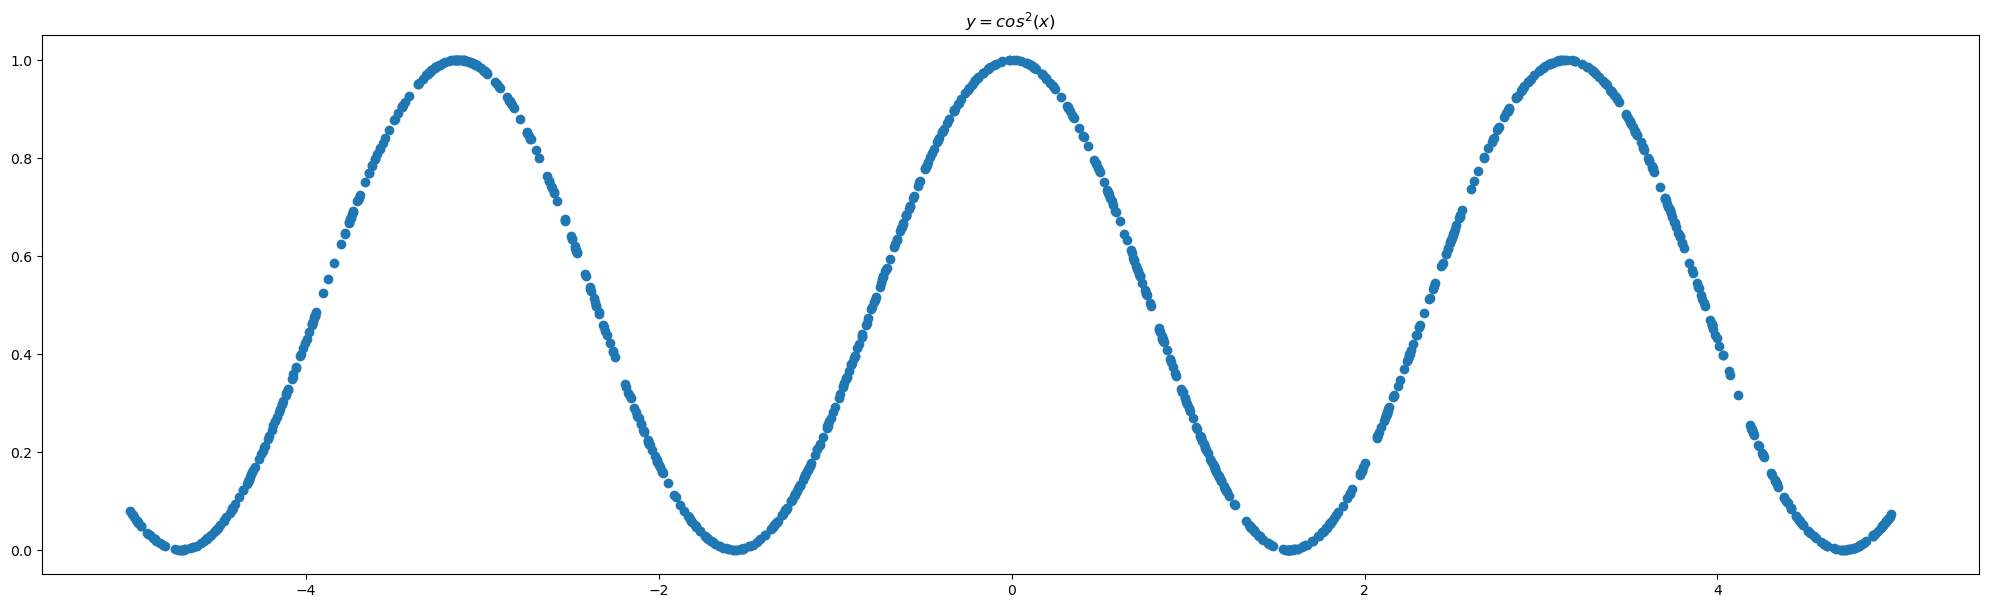

In [335]:
y_sub_train=torch.cos(x_train)**2
plt.plot(x_train.numpy(), y_sub_train.numpy(), 'o')
plt.title('$ y=cos^2(x) $')

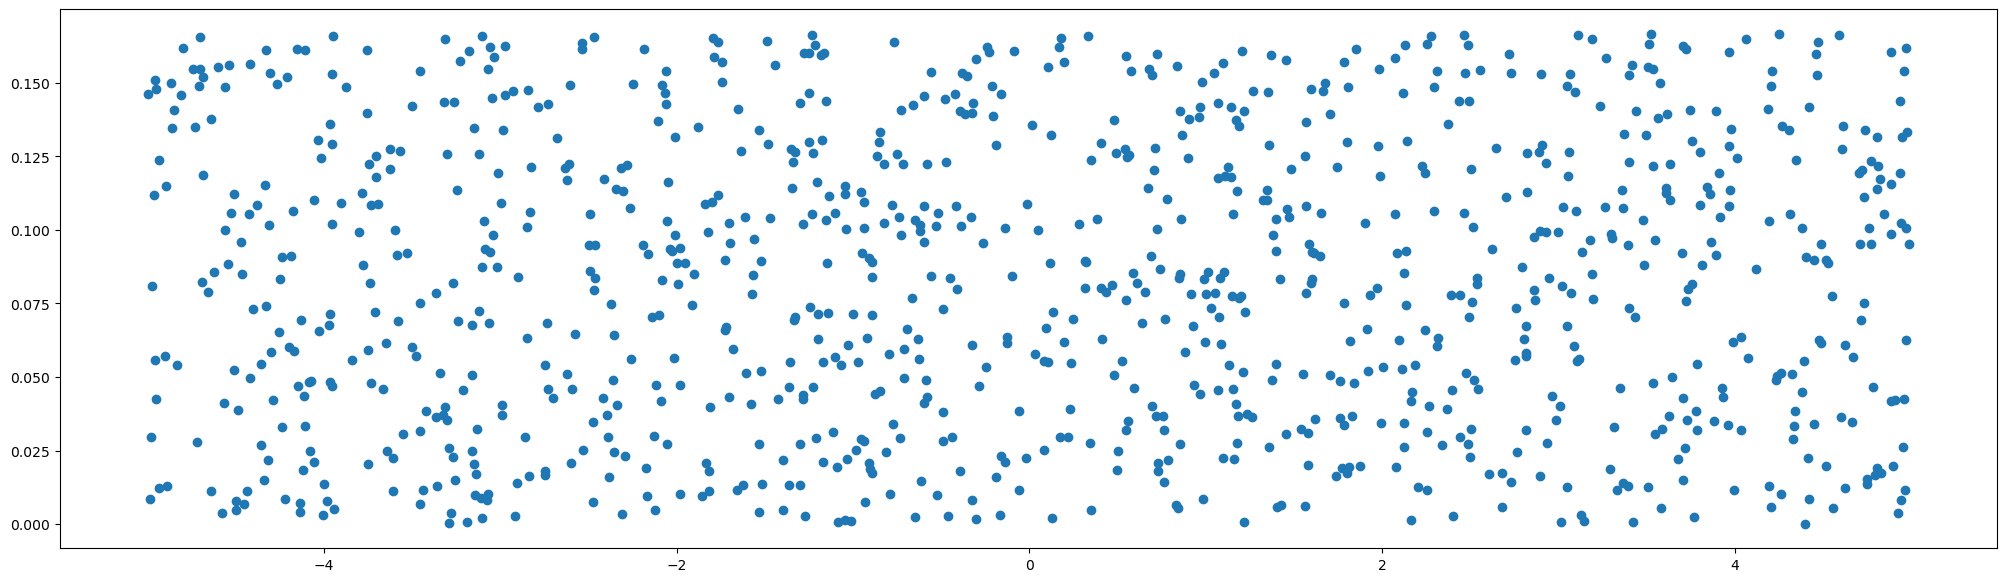

In [336]:
noisy=torch.rand(y_sub_train.shape) /6.
plt.plot(x_train.numpy(), noisy.numpy(), 'o')

Text(0.5, 1.0, 'noisy $ y=cos^2(x) $')

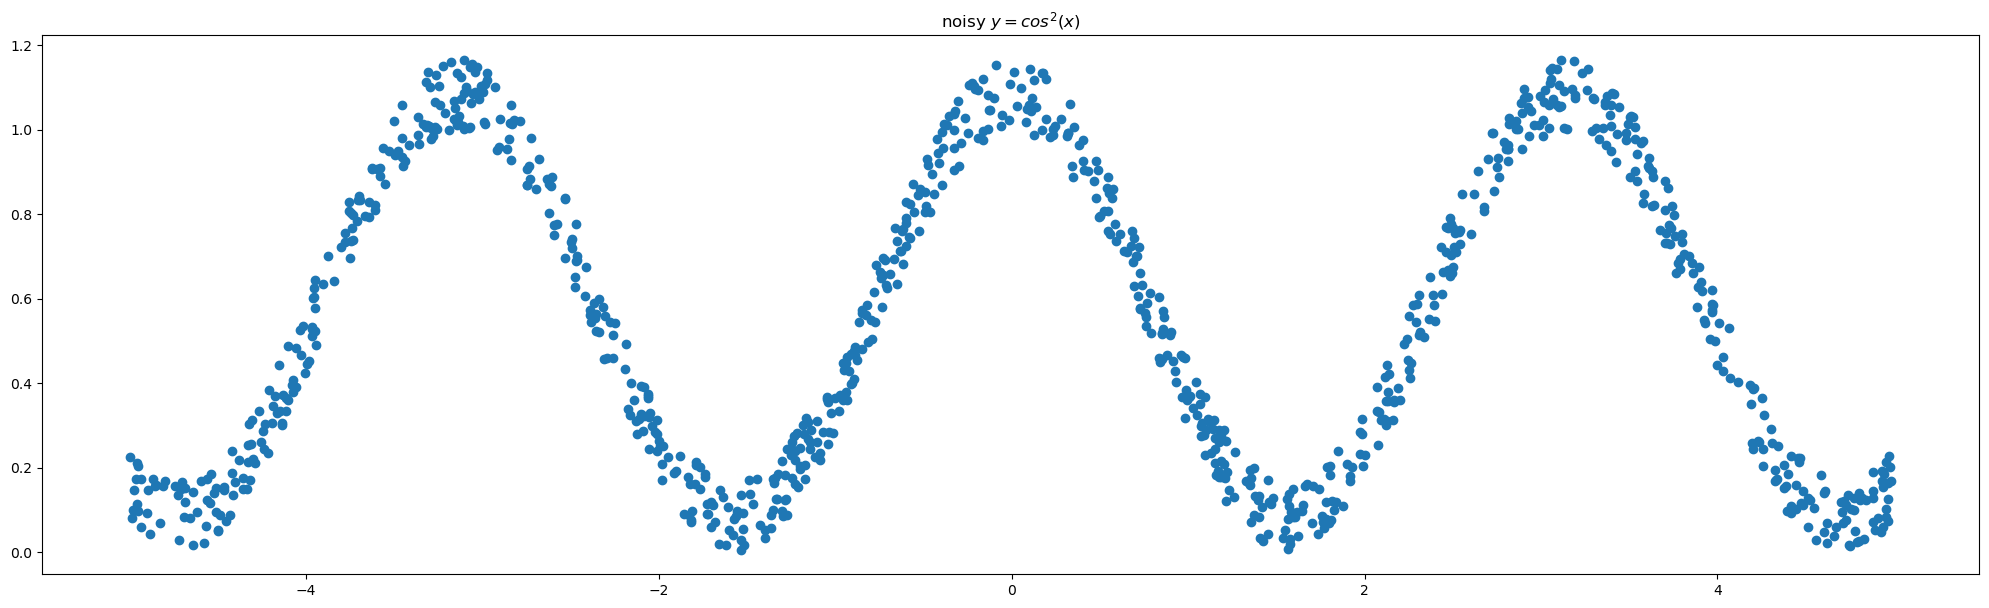

In [337]:
y_train=y_sub_train+noisy
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy $ y=cos^2(x) $')

In [338]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);

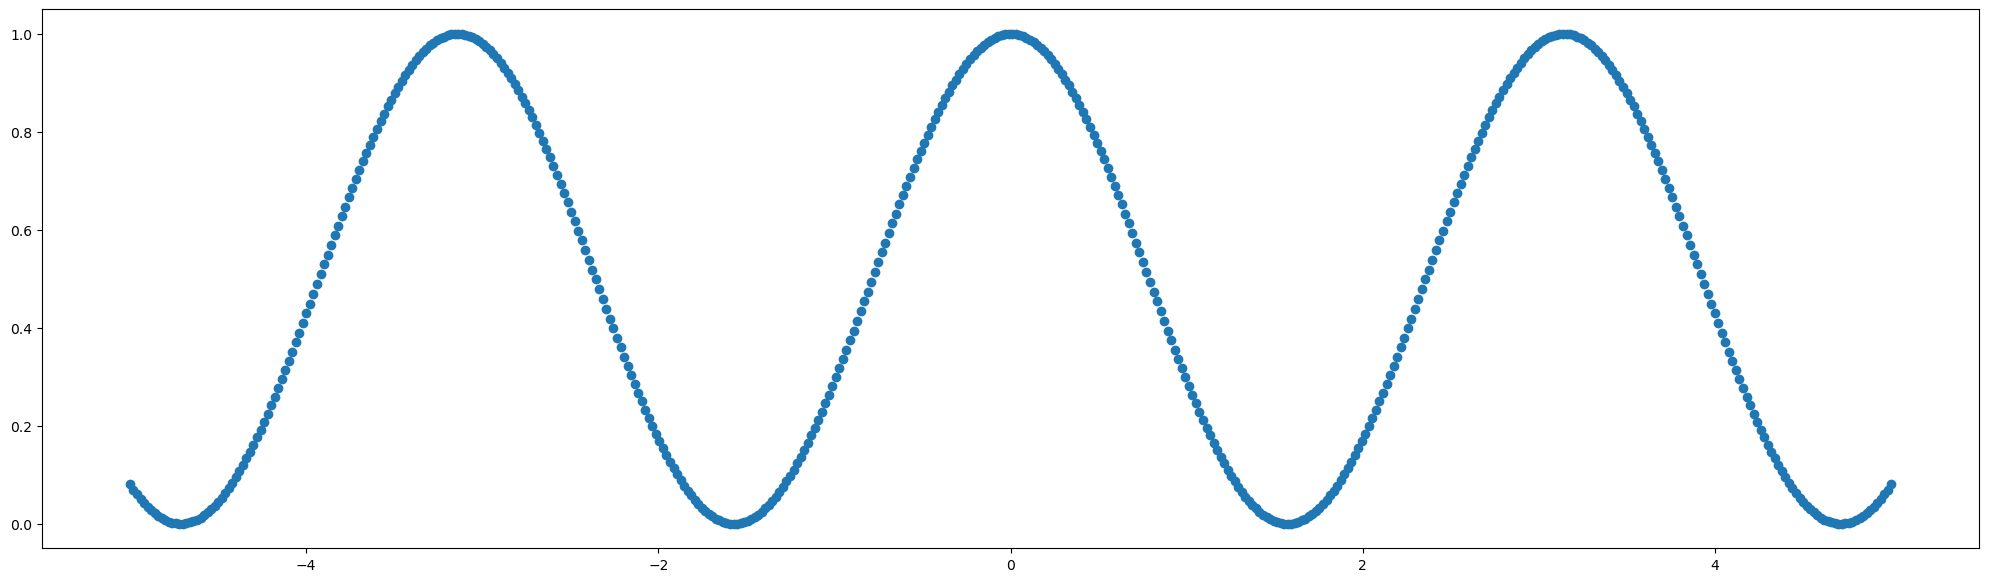

In [339]:
x_val=torch.linspace(-5,5,500)
y_val=torch.cos(x_val.data)**2
plt.plot(x_val.numpy(), y_val.numpy(), 'o')

In [340]:
x_val.unsqueeze_(1)
y_val.unsqueeze_(1);


In [341]:
class OurNet(torch.nn.Module):
    def __init__(self, n_hid_n):
        super(OurNet, self).__init__()
        self.fc1 = torch.nn.Linear(1,n_hid_n)
        self.act1 = torch.nn.Sigmoid()
        
        self.fc3 = torch.nn.Linear(n_hid_n, 1)
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        
        x = self.fc3(x)
        return x
our_net = OurNet (100)
        

In [342]:
def pred (net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', c = 'g', label ='should')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label = 'predict')
    plt.legend(loc= 'upper left')

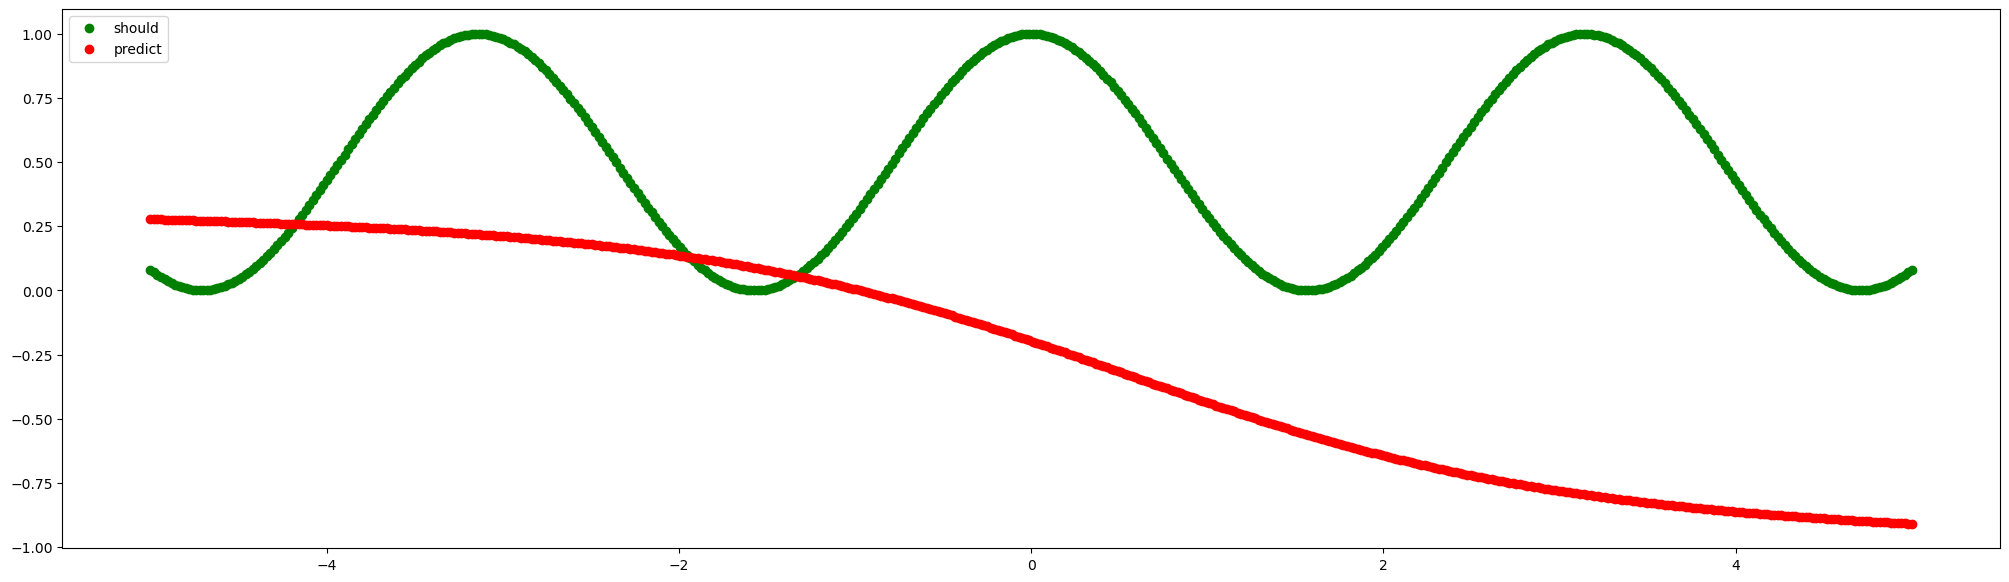

In [343]:
pred(our_net, x_val, y_val)

In [344]:
optimizer = torch.optim.Adam(our_net.parameters(), lr=0.001)

In [345]:
def loss (pred, true):
    sq = (pred - true)**2
    return sq.mean()

In [346]:
for e in range(10000):
    optimizer.zero_grad()

    y_pred=our_net.forward(x_train)
    loss_val = loss(y_pred, y_train)
    #print(loss_val)

    loss_val.backward()
    optimizer.step()



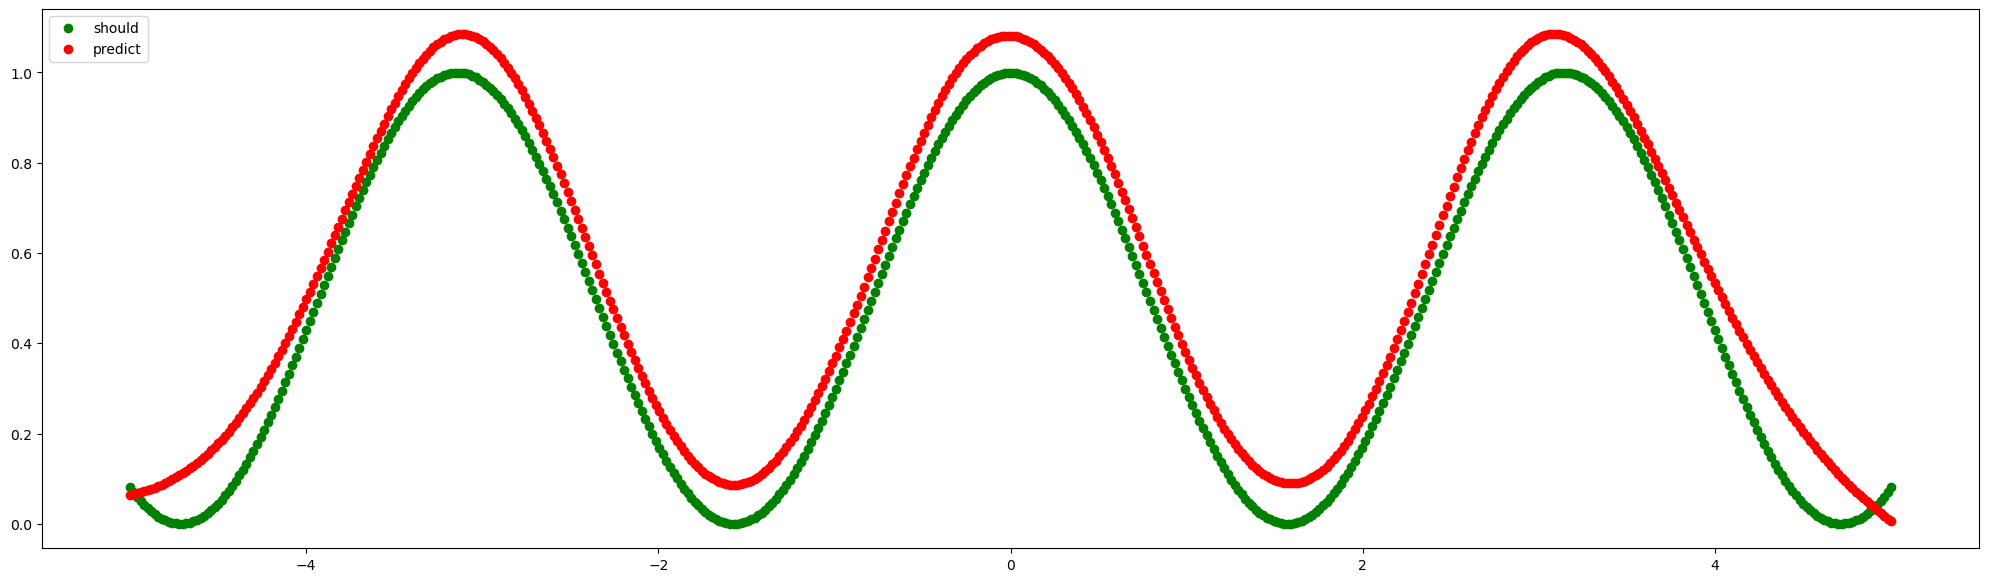

In [347]:
pred(our_net, x_val, y_val)